In [2]:
#판다스 사용
import pandas as pd
from pandas import DataFrame, Series

myCampus = Series([100,200,300,400,500])
print(myCampus)
print(type(myCampus))

0    100
1    200
2    300
3    400
4    500
dtype: int64
<class 'pandas.core.series.Series'>


In [6]:
myCampus = Series([100,200,300,400,500],
    index=["2025-01-01", "2025-02-01", "2025-03-01", "2025-04-01", "2025-05-01"])

#슬라이싱
myCampus["2025-01-01":"2025-03-01"]


2025-01-01    100
2025-02-01    200
2025-03-01    300
dtype: int64

In [22]:
#DataFrame 생성
data = {
        "foreigner":[1,2,3,4,5,6],
        "sratio" : [10,20,30,40,50,60],
        "org" : [100,200,300,400,500,600],
        "sprice" : [1,2,3,4,5,6],
        "private" : [10,20,30,40,50,60]
        }

frame1 = DataFrame(data)
print(frame1.shape)
print(frame1.info())


(6, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   foreigner  6 non-null      int64
 1   sratio     6 non-null      int64
 2   org        6 non-null      int64
 3   sprice     6 non-null      int64
 4   private    6 non-null      int64
dtypes: int64(5)
memory usage: 368.0 bytes
None


In [ ]:
frame2 = DataFrame(data,
                   columns=["foreigner", "org", "private", "sprice", "sratio"],
                   index=["2025-01-01", "2025-02-01", "2025-03-01", "2025-04-01", "2025-05-01", "2025-06-01"])

#컬럼 슬라이싱
print(frame2["org"])
print(type(frame2["foreigner"]))

Empty DataFrame
Columns: [foreigner, org, private, sprice, sratio]
Index: []
<class 'pandas.core.series.Series'>


In [ ]:
#행 데이터를 슬라이싱(날짜기반 변경):location
print(frame2.loc["2025-01-01"])

foreigner      1
org          100
private       10
sprice         1
sratio        10
Name: 2025-01-01, dtype: int64


In [30]:
frame2.T

,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01
foreigner,1,2,3,4,5,6
org,100,200,300,400,500,600
private,10,20,30,40,50,60
sprice,1,2,3,4,5,6
sratio,10,20,30,40,50,60


In [31]:
frame2.transpose()

,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01
foreigner,1,2,3,4,5,6
org,100,200,300,400,500,600
private,10,20,30,40,50,60
sprice,1,2,3,4,5,6
sratio,10,20,30,40,50,60


In [32]:
#파일을 로딩
!type c:\work\ex1.csv

id, name, price, description
1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [33]:
#데이터프레임으로 로딩
frame5 = pd.read_csv("c:\\work\\ex1.csv")
frame5

,id,name,price,description
0,1,iphone,890000,iphone 6s 7 8 x
1,2,android,990000,samsung phone
2,3,winphone,450000,microsoft winphone


In [34]:
!type c:\work\ex2.csv

1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [36]:
#헤더가 없는 경우
frame6 = pd.read_csv("c:\\work\\ex2.csv", header=None, 
                     names=["id", "name", "price", "desc"])
frame6

,id,name,price,desc
0,1,iphone,890000,iphone 6s 7 8 x
1,2,android,990000,samsung phone
2,3,winphone,450000,microsoft winphone


In [37]:
#공백문자가 구분자
!type c:\work\ex3.csv


data1 data2 data3 
1.2 2.3 1.3
0.1 1.5 2.5
3.1 3.2 3.3


In [40]:
frame7 = pd.read_table("c:\\work\\ex3.csv", sep="\s+")
frame7

,data1,data2,data3
0,1.2,2.3,1.3
1,0.1,1.5,2.5
2,3.1,3.2,3.3


In [41]:
#엑셀파일을 로딩해서 데이터프레임으로 복구
dfExcel = pd.read_excel("c:\\work\\demo.xlsx", sheet_name="Sheet1")
dfExcel

,사번,성별,나이,판매금액,수입
0,E001,M,34,123,350
1,E002,F,40,114,450
2,E003,F,37,135,169
3,E004,M,30,139,189
4,E005,F,44,117,183
5,E006,M,36,121,90
6,E007,M,32,133,166
7,E008,F,26,140,120
8,E009,M,32,133,75
9,E010,M,36,133,40


(array([1., 1., 2., 3., 1., 1., 1.]),
 array([26.        , 28.57142857, 31.14285714, 33.71428571, 36.28571429,
        38.85714286, 41.42857143, 44.        ]),
 <BarContainer object of 7 artists>)

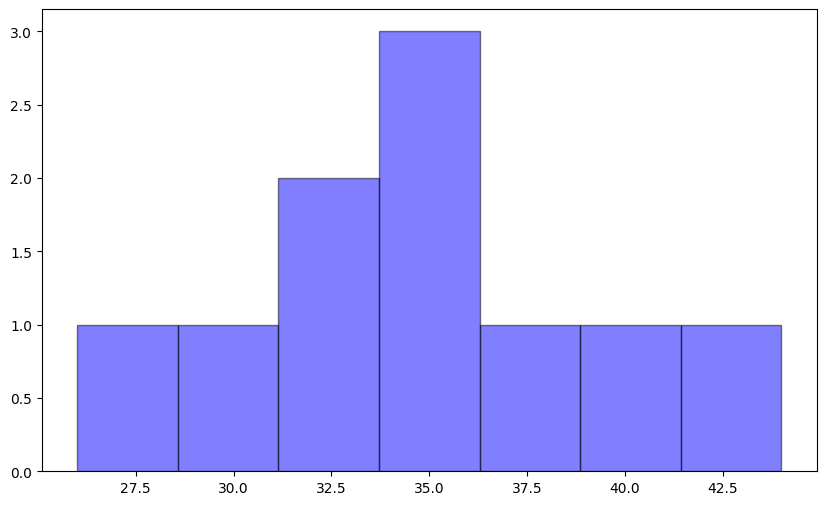

In [44]:
#차트를 출력(매직명령어)
%matplotlib inline
import matplotlib.pyplot as plt 

#비어있는 그림판 (행, 열)
fig = plt.figure(figsize=(10, 6))
#그림판에 차트를 추가 (1행, 1열, 1번 차트)
ax = fig.add_subplot(1, 1, 1)
#히스토그램 차트를 출력
ax.hist(dfExcel["나이"], bins=7, color="blue", alpha=0.5, edgecolor="black")